In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from dotmap import DotMap

In [4]:
PROJECT_PATH = '../'
DATA_DIR = "/home/swei20/AE/data/"
# DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
SZALAY_PATH = os.path.join("/scratch/ceph/szalay/swei20/AE", 'pca.h5')
sys.path.insert(0, PROJECT_PATH)

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
import tensorflow as tf
# tf.enable_v2_behavior()
gpus = tf.config.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Loading Data

In [88]:
with h5py.File(PCA_PATH, 'r') as f:
#     flux = f['flux'][()]
#     flux_idx = f['flux_idx'][()]
#     Fe_H = f['Fe_H'][()]
#     log_g = f['log_g'][()]
#     O_M = f['O_M'][()]
#     C_M = f['C_M'][()]
    T_eff = f['T_eff'][()]
#     wave = f['wave'][()]
#     eigv = f['flux_eigv'][()]


In [32]:
(Fe, Te, Lg, CM, OM) =  np.where(flux_idx)

In [35]:
import pandas as pd

In [38]:
para = pd.DataFrame(data=np.transpose([Fe, Te, Lg, CM, OM]), columns = ["Fe", "Te", "Lg", "CM", "OM"])

In [44]:
Fe_H

array([-2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 ,
       -0.25,  0.  ,  0.25,  0.5 ,  0.75])

In [46]:
# OM_idx = 1
# CM_idx = 3
para1d  = para[(para["OM"] == 1 ) & (para["CM"] == 3)  & (para["Lg"] == 8) & (para["Fe"]==10)]

In [ ]:
p

In [51]:
idx1d = para1d.index

In [8]:
DATA_PATH = os.path.join(DATA_DIR, 'pc32.h5')
with h5py.File(DATA_PATH, 'r') as f:
    flux = f['flux'][()]
#     flux32m = f['flux32m'][()]
#     flux32ms = f['flux32ms'][()]

In [24]:
# with h5py.File(DATA_PATH, 'a') as f:
#     f.create_dataset('fmean', data = f_mean, shape = (32,))
#     f.create_dataset('fm_std', data = std, shape = (1,))  

In [9]:
flux.shape

(116614, 32)

### LOADING MODEL

In [55]:
config_dict ={
    "data": {
      "dir":"./data",
      "filename": "pc32.h5",
      "train": "flux"
    },
    "model":{
      "aug": 1,
      "name": "eval",
      "input_dim": 32,
      "latent_dim": 8,
      "hidden_dims": [128, 64],
      "dropout": 0.0,
      "lr": 0.003,
      "reg1": 0.00001,
      "loss": "mse",
      "opt": "adam",
      "batchnorm": 0,
      "act_in": "leaky",
      "act_em": "leaky",
      "act_hd": "leaky"
    },
    "trainer":{
      "epoch": 1,
      "batch_size": 16,
      "validation_split":0.3,
      "verbose": 1,
      "save": 0
    },
    "callbacks":{
        "checkpoint_monitor": "val_loss",
        "checkpoint_mode": "min"
    }
}
config = DotMap(config_dict)

In [56]:
#  loss: 0.0113 
# - mean_squared_error: 0.0023 
# - val_loss: 0.0337 
# - val_mean_squared_error: 0.0248

In [57]:
from ae.model.simple_ae_model import SimpleAEModel
from ae.trainer.simple_ae_trainer import SimpleAETrainer

In [58]:
mm = SimpleAEModel()
mm.build_model(config)

In [59]:
MODEL_PATH="/home/swei20/AE/trained_model/ep500_mse_lr2_32_l8_h128_h64_INleEMleHDle_pc32_0703_212611/"
mm.load(MODEL_PATH)

Loading model checkpoint /home/swei20/AE/trained_model/ep500_mse_lr2_32_l8_h128_h64_INleEMleHDle_pc32_0703_212611/ ...

Model loaded


In [60]:
data = flux
tt = SimpleAETrainer(mm, config)
history = tt.train((data, data), ep=1)

5102/5102 [==============================] - 16s 3ms/step - loss: 0.0107 - mean_squared_error: 0.0089 - val_loss: 0.2823 - val_mean_squared_error: 0.2804


In [62]:
tt.eval(eigv)

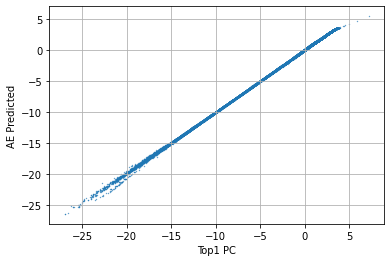

In [41]:
idx=0
plt.scatter(tt.x_train[:, idx],tt.ae_pred[:, idx], s=0.1)
# plt.plot(   s=0.1, c='k')
plt.xlabel(f"Top{idx+1} PC")
plt.ylabel("AE Predicted")

# plt.legend()
plt.grid(1)

In [63]:
def plot_err(org, rec):
    f, axs =  plt.subplots(8, 4,figsize=(20, 40))
    for idx, ax in enumerate(axs.flatten()):
        ax.scatter(org[:, idx],rec[:, idx], s=0.1, color  = 'r')
        ax.set_xlabel(f"PC - {idx + 1}")
        ax.set_ylabel(f"AE - {idx + 1} ")
        ax.grid(1)

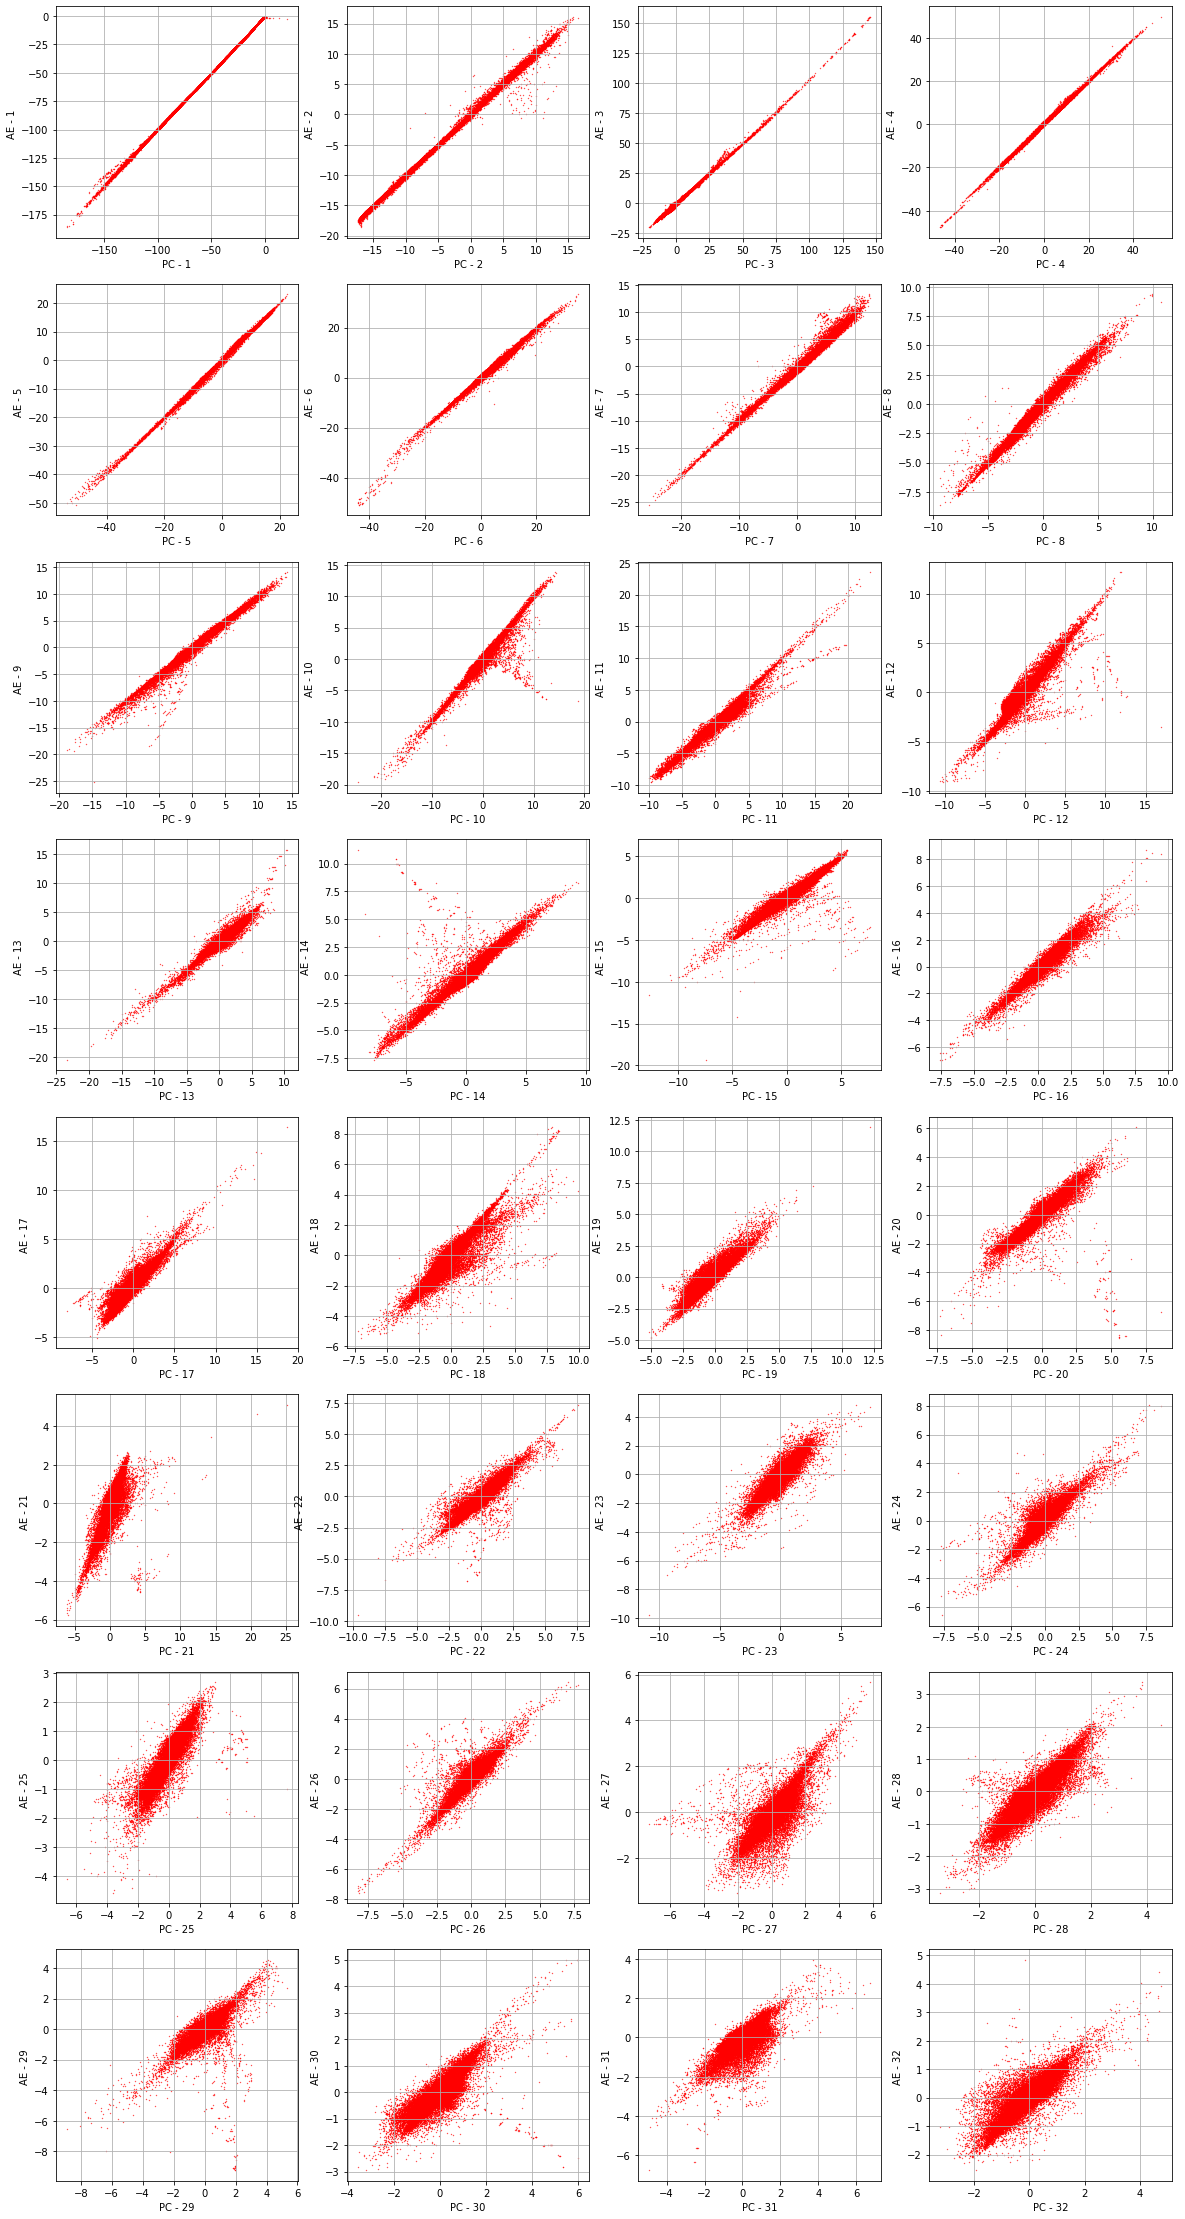

In [64]:
plot_err(tt.x_train, tt.ae_pred)

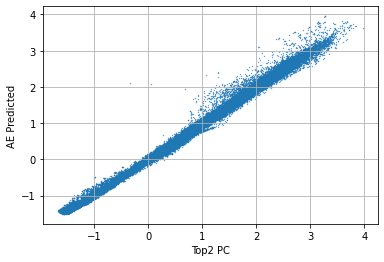

In [42]:
idx=1
plt.scatter(tt.x_train[:, idx],tt.ae_pred[:, idx], s=0.1)
# plt.plot(   s=0.1, c='k')
plt.xlabel(f"PC - {idx + 1}")
plt.ylabel(f"AE - {idx + 1} "`)

# plt.legend()
plt.grid(1)

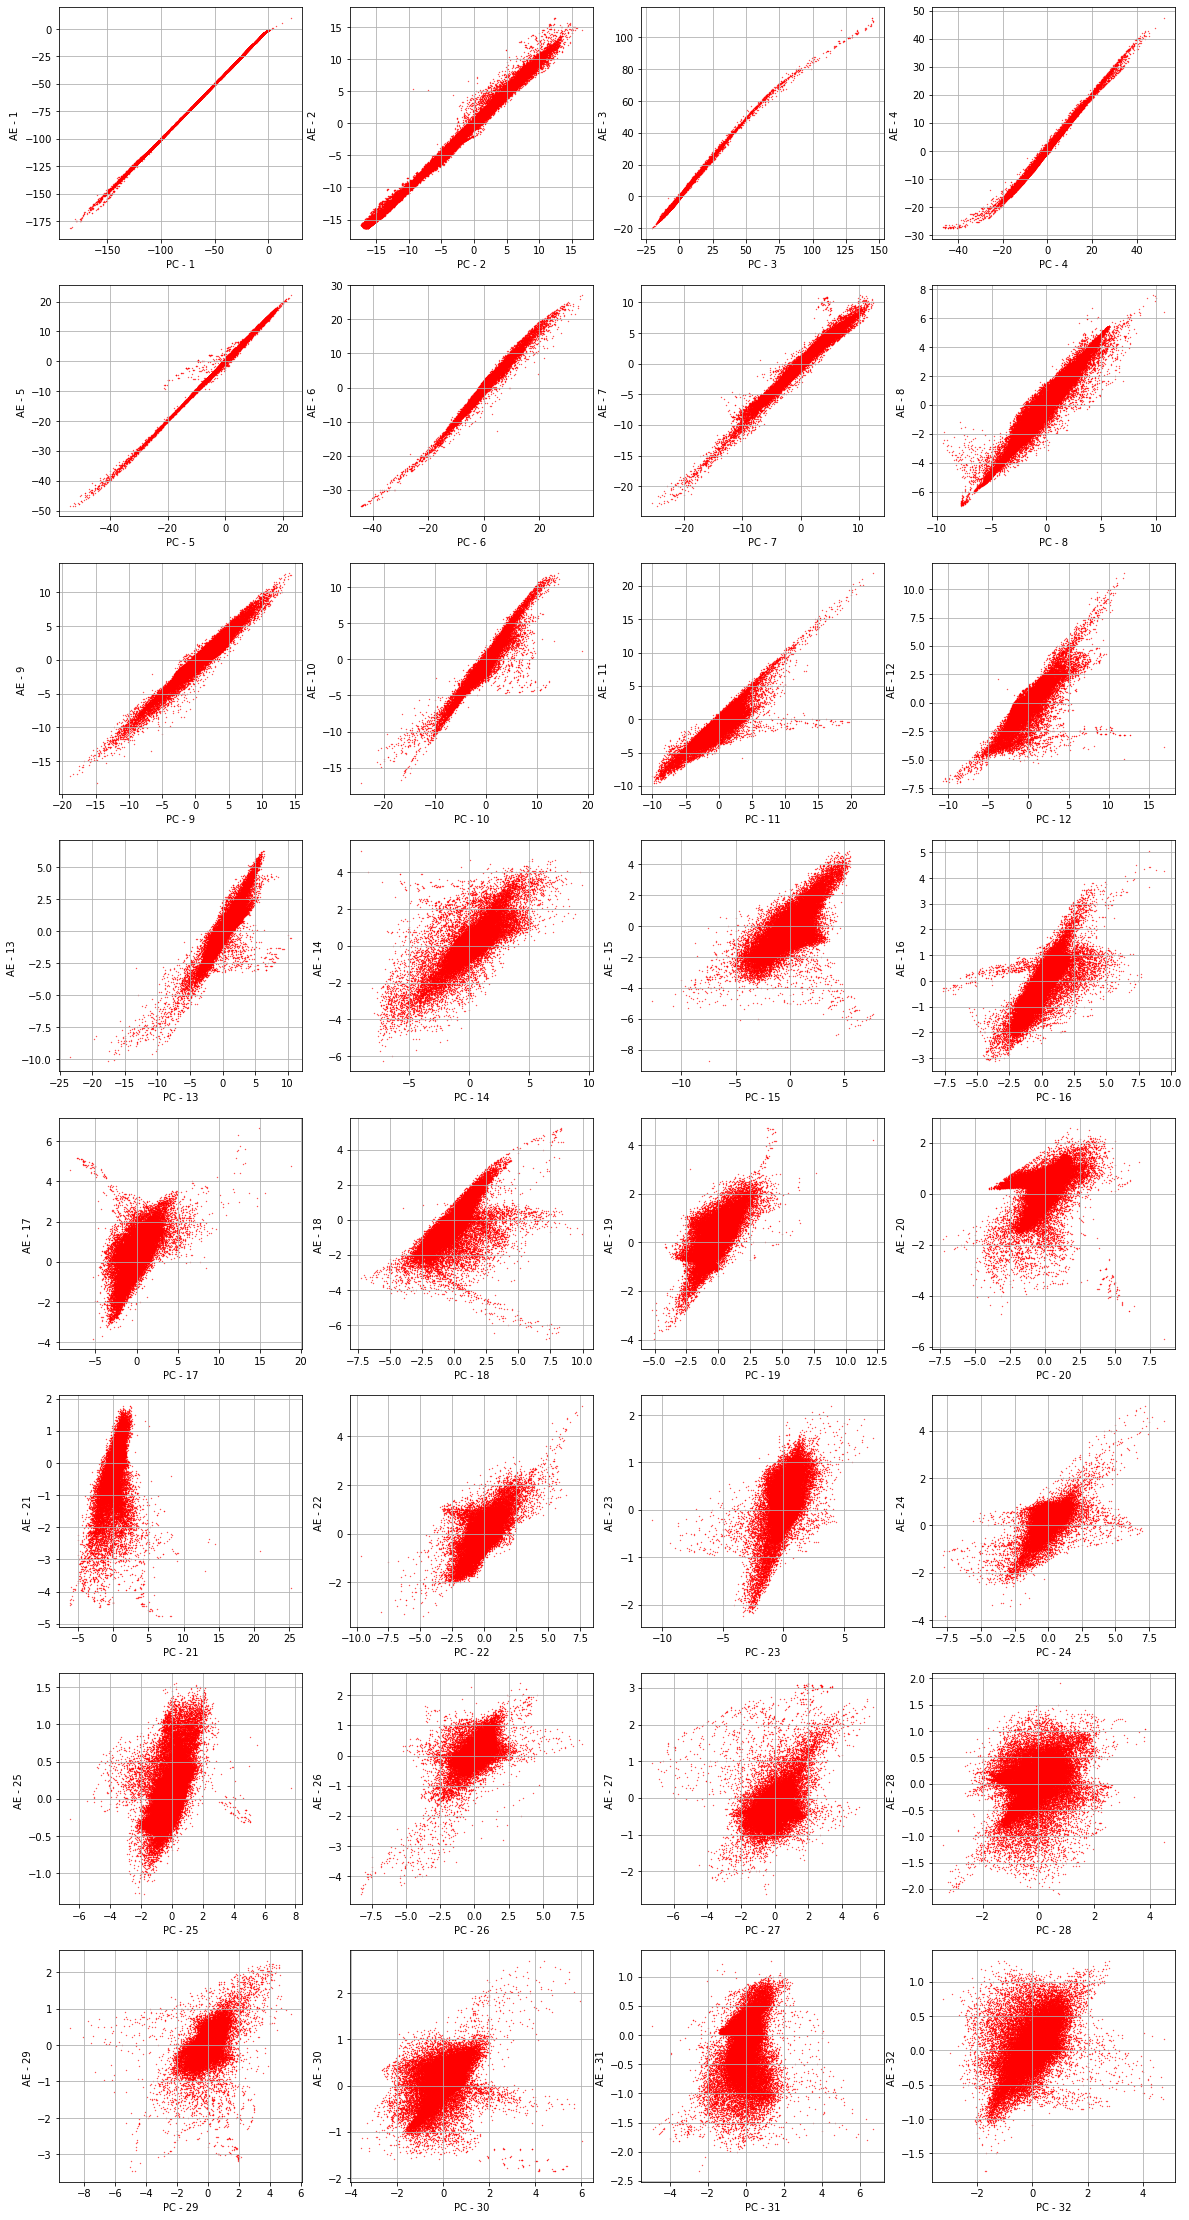

In [61]:
plot_err(flux, ae_pred1)

In [20]:
en32 = mm.encoder.predict(data)

In [23]:
s =np.linalg.svd(en32, compute_uv=False)

In [29]:
s.shape

(8,)

In [2]:
from ae.eval.plot_util import *

ModuleNotFoundError: No module named 'ae'

In [1]:
plot_s(s)

NameError: name 'plot_s' is not defined

In [72]:
en1d = en32[idx1d,:]

In [73]:
en1d.shape

(66, 8)

In [77]:
dfen = pd.DataFrame(data = en1d,columns=[f"pc{i}"  for i in range(1,9) ])

In [78]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [87]:
Te

array([ 0,  0,  0, ..., 60, 60, 60])

In [123]:
def plot_traj(data, i, j, T_eff, ax=None):
    ax = ax or plt.gca()
    ax.scatter(data[:,i], data[:,j], c=T_eff, cmap = "Spectral")
    ax.set_xlabel(f"Latent {i}")
    ax.set_ylabel(f"Latent {j}")
#     return pp
#     ax.colorbar()

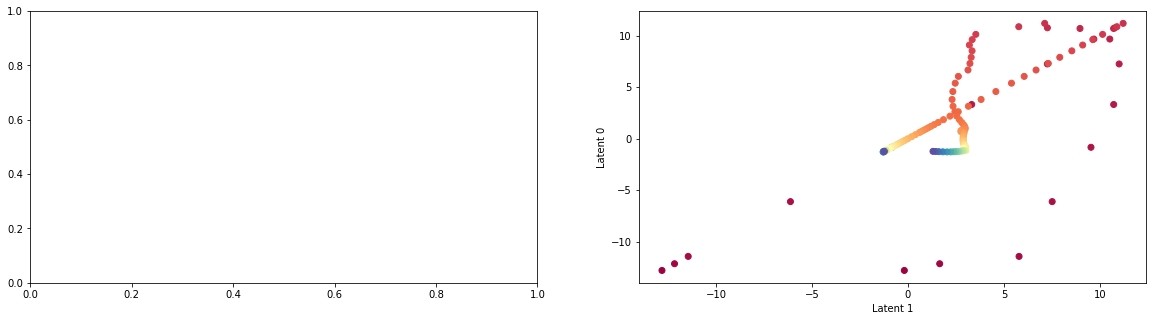

In [122]:
f, axs = plt.subplots(1,2, figsize=(20, 1*5))
axss = axs.flatten()
k=0
for i in range(2):
    plot_traj(en1d, i, 0, T_eff, ax=axss[k])
    k+=1

In [102]:
56/2

28.0

In [ ]:
plot_traj(en1d, i, j, T_eff, ax=ax)

In [117]:
axss[1]

<AxesSubplot:>

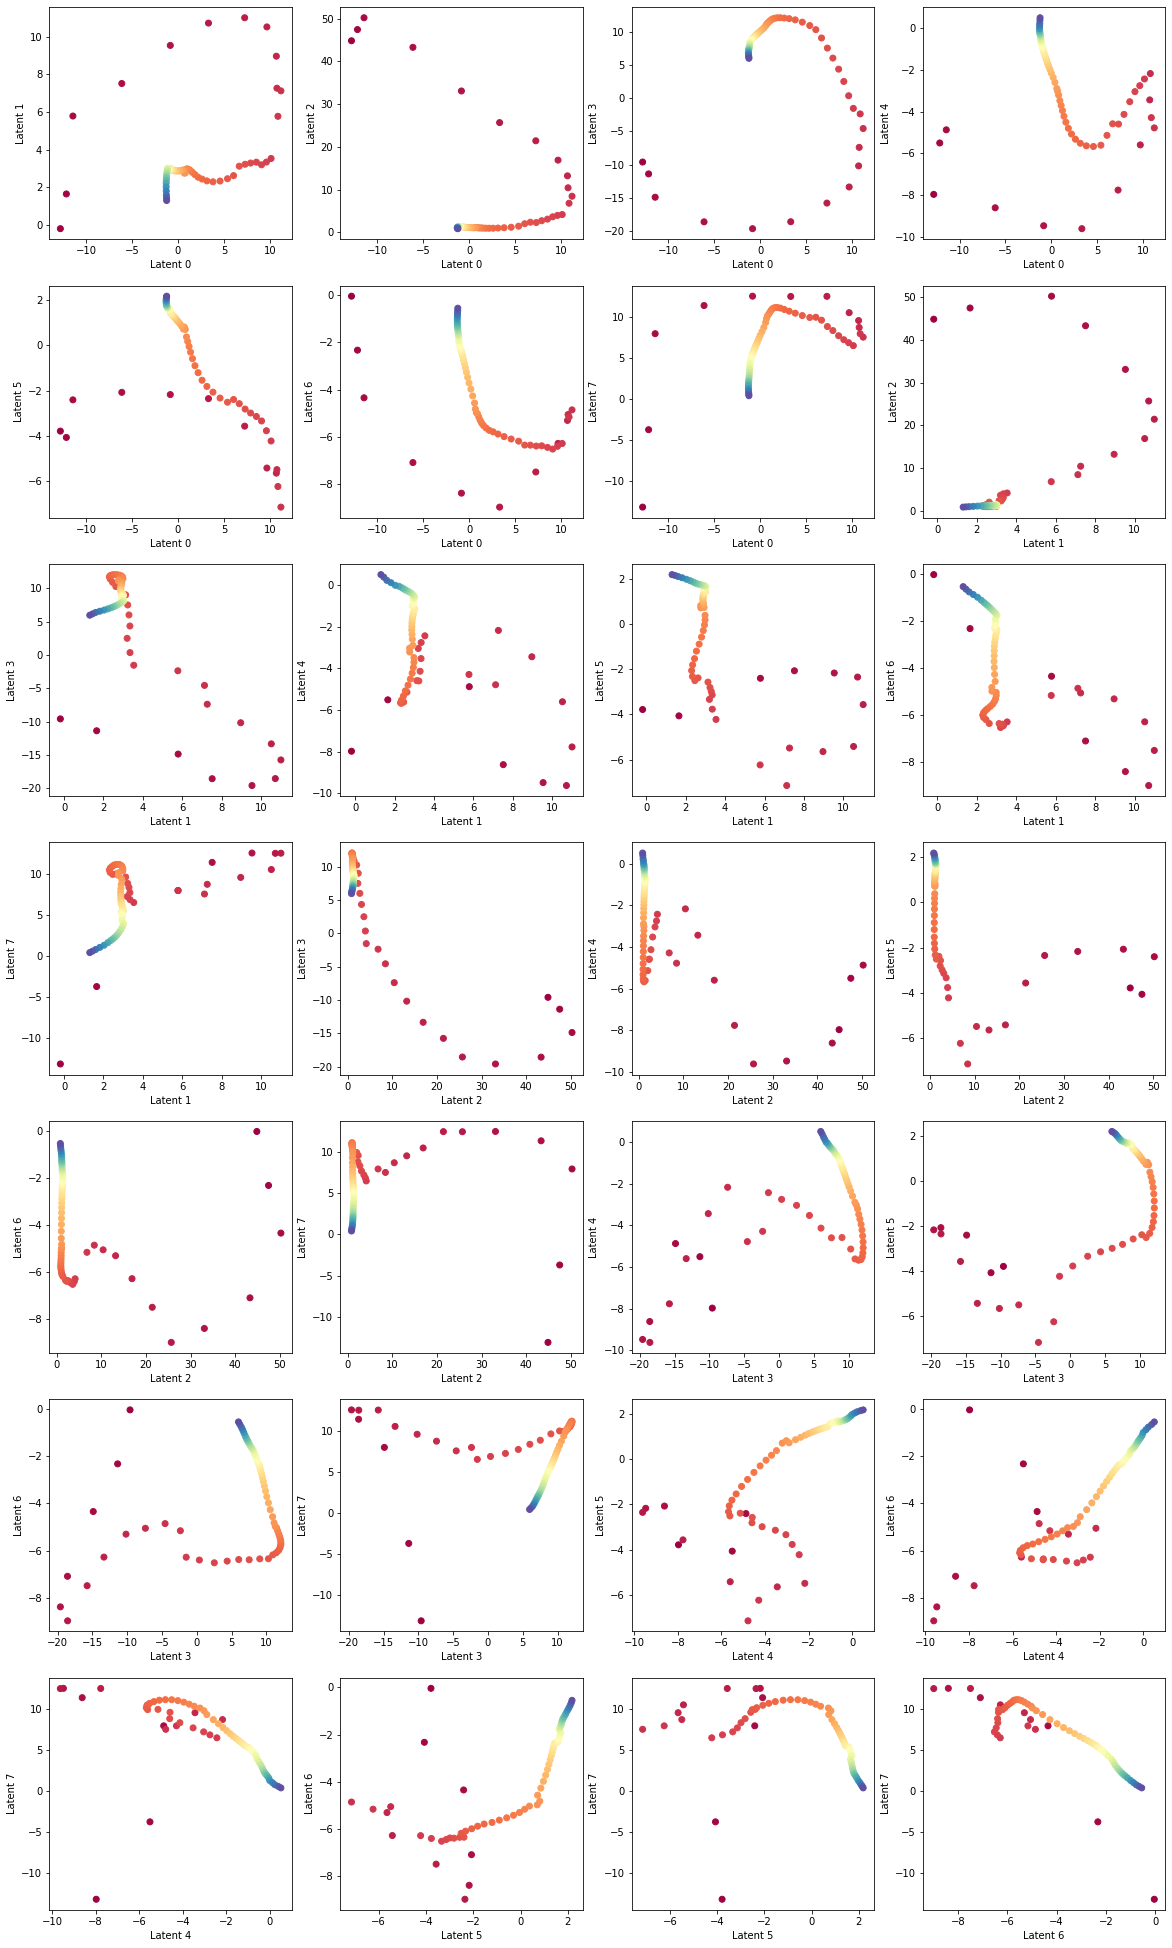

In [127]:
f, axs = plt.subplots(7,4, figsize=(20,7*5))
axss = axs.flatten()
k = 0
for i in range(8):
    for j in range(i+1, 8):
        plot_traj(en1d, i, j, T_eff, ax=axss[k])
        k =k + 1
# plt.colorbar(cax=pp)
# print(k)
plt.savefig("TeffTraject.png", facecolor='w')

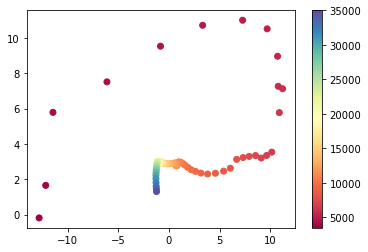

In [89]:
plt.scatter(*en1d[:,:2].T, c=T_eff, cmap = "Spectral")
plt.colorbar()
